# Building a dense, fully-connected neural network for image classification

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load and explore data

In [2]:
mnist_train = pd.read_csv('datasets/mnist-in-csv/mnist_train.csv')
mnist_test = pd.read_csv('datasets/mnist-in-csv/mnist_test.csv')

In [3]:
mnist_train.shape, mnist_test.shape

((60000, 785), (10000, 785))

In [4]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### display an image

In [5]:
img = mnist_train[1:2]

img = img.drop('label', axis =1)

In [6]:
img = img.values

img.shape

(1, 784)

In [7]:
img = img.reshape(1, 28, 28)

img.shape

(1, 28, 28)

In [8]:
img = img.squeeze()

img.shape

(28, 28)

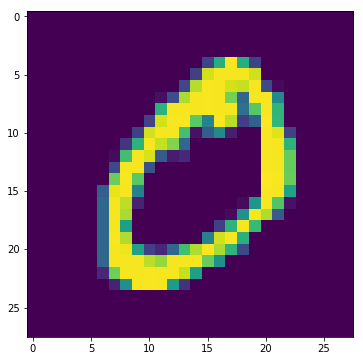

In [9]:
plt.figure(figsize = (6, 6))

plt.imshow(img)

In [10]:
mnist_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Preprocessing

In [11]:
mnist_train = mnist_train.dropna()
mnist_test = mnist_test.dropna()

#### Identifying features and labels

In [12]:
mnist_train_features = mnist_train.drop('label', axis =1)
mnist_train_target = mnist_train['label']

mnist_test_features = mnist_test.drop('label', axis =1)
mnist_test_target = mnist_test['label']

In [13]:
mnist_train_features.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
mnist_test_features.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
mnist_train_target.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [16]:
mnist_test_target.head()

0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64

#### Normalization

In [17]:
print("train max - ", mnist_train.values.max())
print("train min - ", mnist_train.values.min())
print("test max - ", mnist_test.values.max())
print("test min - ", mnist_test.values.min())

train max -  255
train min -  0
test max -  255
test min -  0


In [18]:
mnist_train = mnist_train.astype('float32')

mnist_train = mnist_train/255

In [19]:
mnist_test = mnist_test.astype('float32')

mnist_test = mnist_test/255

In [20]:
print("train max - ", mnist_train.values.max())
print("train min - ", mnist_train.values.min())
print("test max - ", mnist_test.values.max())
print("test min - ", mnist_test.values.min())

train max -  1.0
train min -  0.0
test max -  1.0
test min -  0.0


#### converting to tensors
* Labels are in one column. Converting that one row but multiple columns (for loss func, target should be a 1D tensor; y vector should be of type long)

In [21]:
import torch

In [22]:
X_train_tensor = torch.tensor(mnist_train_features.values, dtype=torch.float)
x_test_tensor  = torch.tensor(mnist_test_features.values, dtype=torch.float) 

Y_train_tensor = torch.tensor(mnist_train_target.values, dtype=torch.long)
y_test_tensor  = torch.tensor(mnist_test_target.values, dtype=torch.long)

In [23]:
X_train_tensor.shape, Y_train_tensor.shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [24]:
x_test_tensor.shape, y_test_tensor.shape

(torch.Size([10000, 784]), torch.Size([10000]))

### Defining DNN model and parameters

In [25]:
import torch.nn as nn

In [26]:
input_size = 784
output_size = 10

hidden1_size = 16
hidden2_size = 32

In [27]:
class Net(nn.Module):
    
    def __init__(self):
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size) 
        self.fc2 = nn.Linear(hidden1_size, hidden2_size) 
        self.fc3 = nn.Linear(hidden2_size, output_size) 
    
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        
        x = self.fc3(x)
        
        return torch.log_softmax(x, dim=-1)

In [28]:
model = Net()

In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [30]:
model.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [31]:
X_train_tensor = X_train_tensor.to(device)
x_test_tensor  = x_test_tensor.to(device) 

Y_train_tensor = Y_train_tensor.to(device)
y_test_tensor  = y_test_tensor.to(device)

In [32]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

loss_fn = nn.NLLLoss()

### training

In [33]:
epochs = 500

for epoch in range(1, epochs + 1):

    optimizer.zero_grad()
    Y_pred = model(X_train_tensor)

    loss = loss_fn(Y_pred , Y_train_tensor)
    loss.backward()

    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch - %d, loss - %0.2f ' %(epoch, loss.item()))

Epoch - 10, loss - 2.25 
Epoch - 20, loss - 2.21 
Epoch - 30, loss - 2.17 
Epoch - 40, loss - 2.14 
Epoch - 50, loss - 2.10 
Epoch - 60, loss - 2.06 
Epoch - 70, loss - 2.02 
Epoch - 80, loss - 1.97 
Epoch - 90, loss - 1.92 
Epoch - 100, loss - 1.87 
Epoch - 110, loss - 1.81 
Epoch - 120, loss - 1.75 
Epoch - 130, loss - 1.70 
Epoch - 140, loss - 1.64 
Epoch - 150, loss - 1.58 
Epoch - 160, loss - 1.52 
Epoch - 170, loss - 1.47 
Epoch - 180, loss - 1.42 
Epoch - 190, loss - 1.36 
Epoch - 200, loss - 1.31 
Epoch - 210, loss - 1.27 
Epoch - 220, loss - 1.22 
Epoch - 230, loss - 1.18 
Epoch - 240, loss - 1.14 
Epoch - 250, loss - 1.10 
Epoch - 260, loss - 1.06 
Epoch - 270, loss - 1.02 
Epoch - 280, loss - 0.99 
Epoch - 290, loss - 0.96 
Epoch - 300, loss - 0.93 
Epoch - 310, loss - 0.90 
Epoch - 320, loss - 0.87 
Epoch - 330, loss - 0.85 
Epoch - 340, loss - 0.83 
Epoch - 350, loss - 0.80 
Epoch - 360, loss - 0.78 
Epoch - 370, loss - 0.76 
Epoch - 380, loss - 0.74 
Epoch - 390, loss - 0

### Model Evaluation
* Model.eval tells the network that it is in testing/evaluation phase. Dropout and batch normalisation, in particular, behave differently during testing and training and this will tell it which behaviour to adopt for the following run.

In [34]:
model.eval()

Net(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [37]:
with torch.no_grad():
    correct = 0
    total = 0
    
    outputs = model(x_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    
    y_test = y_test_tensor.cpu().numpy()
    predicted = predicted.cpu()
    print("Accuracy: ", accuracy_score(predicted, y_test))
    print("Precision: ", precision_score(predicted, y_test, average='weighted'))
    print("Recall: ", recall_score(predicted, y_test, average='weighted'))

Accuracy:  0.8461
Precision:  0.8532634754945552
Recall:  0.8461


### Using model for predictions 

In [38]:
print("sample target data = ", mnist_test_target.values[1005])

sample target data =  9


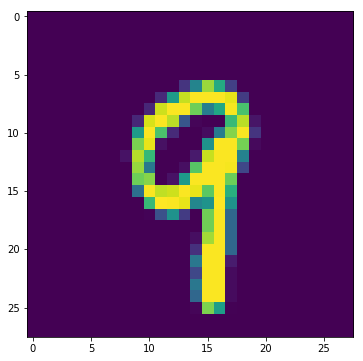

In [39]:
sample_img = mnist_test_features.values[1005]
sample_img = sample_img.reshape(1, 28, 28)

sample_img = sample_img[0,:,:]

plt.figure(figsize =(6, 6))
plt.imshow(sample_img)

In [40]:
sample = np.array(mnist_test_features.values[1005]) 

sample_tensor = torch.from_numpy(sample).float()

In [42]:
y_pred = model(sample_tensor.to(device))
y_pred

tensor([-6.3362, -3.4425, -3.7993, -6.7993, -2.2656, -7.3611, -5.6244, -1.9922,
        -3.8763, -0.3892], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

In [43]:
_, predicted = torch.max(y_pred.data, -1)

In [44]:
print (" The predicted label is : ", predicted.item())

 The predicted label is :  9
